**HW2 - Eden Ahady 318948106**

Lotka – Volterra:

(a) Predator functional response type II (Lecture 3, slide 18)
How would the system with the following parameters change by changing the ingestion rate
of the predator to 0.8 (instead of 0.6)?

parameters : rI = 0.6, rG = 0.8, rM = 0.3, AE = 0.6, K = 10, h = 3
initial condition : P=1, C=2

i. Describe in your own words the changes you expect to see and why.

ii. Solve numerically and plot the results, draw the nullclines and the trajectories. 

Prey Population (Red Dashed Line):

The prey population will exhibit a different growth pattern compared to the previous parameter values.
With an increased reproduction rate (rl = 0.6), the prey population is expected to grow at a faster rate.
However, the carrying capacity (k = 10) remains the same, so the prey population is still expected to stabilize around that value.

Consumer Population (Blue Line):

The consumer population will also display a different pattern compared to the previous parameters.
The change in reproduction rate of the predator (rg = 0.8) suggests a slightly slower growth rate for the consumer population.
Additionally, the increased conversion efficiency (AE = 0.6) and the longer hunting/handling time (h = 3) can potentially support the consumer population's growth.
Overall, the updated parameter values are expected to influence the growth rates and dynamics of both the prey and consumer populations. The specific changes in the plots can only be determined by running the code and generating the graph.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
import sympy as sm
p =1
c = 2
rl=0.6
rg= 0.8
rm = 0.3
AE = 0.6
k = 10
h = 3

In [3]:
def LotVmod0D(states,t,rl,rg,rm,ae,k,h):
    P,C = states
    ingestC = (rl*P*C)/(h+P)
    growthP = rg*P*(1-P/k)
    mortC = rm*C
    
    dp = growthP - ingestC
    dc = ingestC*ae - mortC
    
    return np.array([dp,dc])

In [4]:
time = np.arange(0,200,1)
sol = odeint(LotVmod0D,[1,2],time,(0.6,0.8,0.3,0.6,10,3))

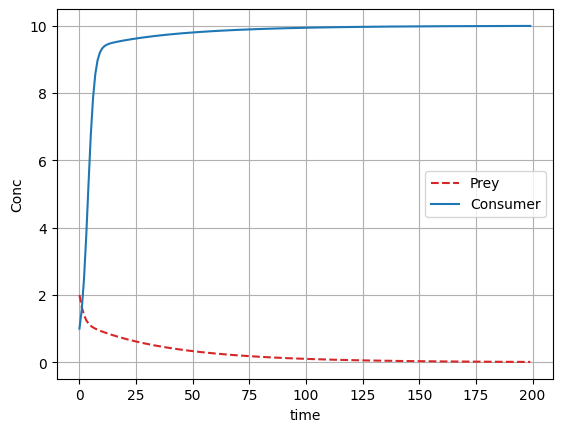

In [5]:
plt.plot(time,sol[:,1],color='tab:red',ls='--',label='Prey')
plt.plot(time,sol[:,0],label='Consumer')
plt.ylabel('Conc')
plt.xlabel('time')
plt.grid()
plt.legend()

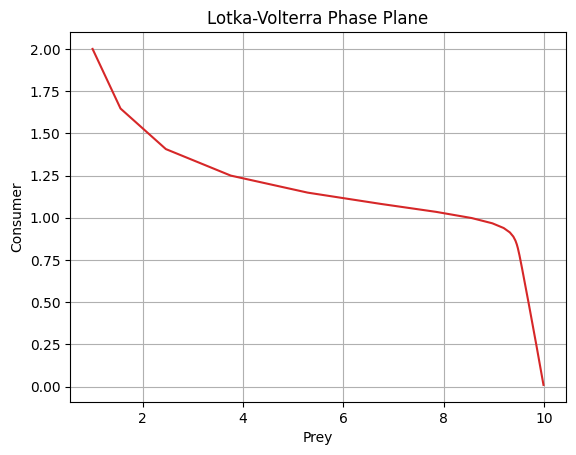

In [6]:
plt.plot(sol[:,0],sol[:,1],color='tab:red',ls='-')
plt.title('Lotka-Volterra Phase Plane')
plt.ylabel('Consumer')
plt.xlabel('Prey')
plt.grid()

In [7]:
def LotVmod0D(states,t=0):
    P,C = states
    ingestC = (rl*P*C)/(h+P)
    growthP = rg*P*(1-P/k)
    mortC = rm*C
    
    dp = growthP - ingestC
    dc = ingestC*AE - mortC
    
    return np.array([dp,dc])

In [8]:
time = np.linspace(0,200,1000)

X, infodict = odeint(LotVmod0D, [1,2], time, full_output=True)
x,y = X.T

In [9]:
# define the system symbolically (assuming a predator-prey-system with no negative values)
p, c = sm.symbols('p, c', negative=False)

# differential equations
P = rg*p*(1-p/k) - rl*p*c
C = rl*p*c*AE - rm*c

# use sympy's way of setting equations to zero
PEqual = sm.Eq(P, 0)
CEqual = sm.Eq(C, 0)

# compute equilibria (fixed points, extrema)
fp = sm.solve( (PEqual, CEqual), p, c )
print('The equilibria of this system are %s' %fp)

The equilibria of this system are [(0.0, 0.0), (0.833333333333333, 1.22222222222222), (10.0000000000000, 0.0)]


<ipython-input-10-48bf12cfdf80>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(0, 0, 'r*', label = 'Equilibria',color='green')


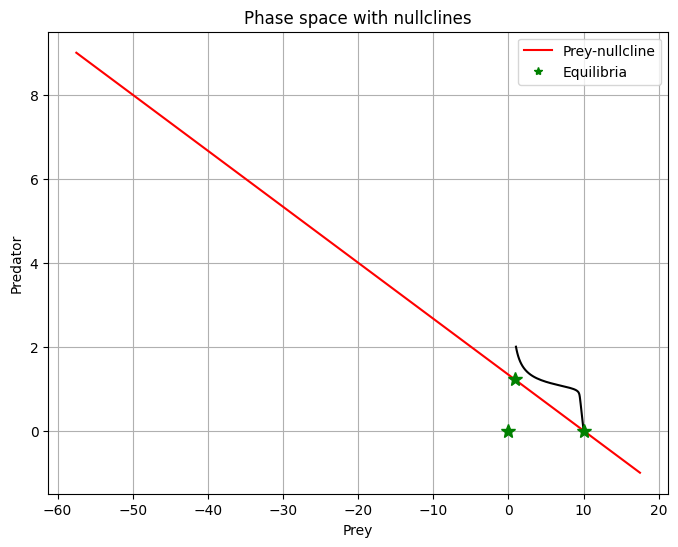

In [10]:
# solve zero-set-equations independently from each other
pcline = sm.solve(PEqual, p)
ccline = sm.solve(CEqual, c )
# take only non-zero solution (needs to be casted into string)
pc = str([u for u in pcline if u != 0.])
cc = str([v for v in ccline if v != 0.])

# solve bc for y (= the predator values)
Pcline = []
for c in range(-1,10):
    # needs to be evaluated from string
    Pcline.append(eval(pc))

# solve rc for x (= the prey values)
Ccline = []
for p in range(-1,10):
    # needs to be evaluated from string
    Ccline.append(eval(cc))

#prepare plot
fig = plt.figure(figsize=(8,6))
ax3 = fig.add_subplot(1,1,1)
# plot P-nullcline on x-axes   
ax3.plot(Pcline, range(-1,10), 'r-', label = 'Prey-nullcline')
# plot C-nullcline on y-axes   
ax3.plot(range(-1,10), Ccline, 'b-', label = 'Predator-nullcline')
ax3.set_title("Phase space with nullclines")
ax3.set_xlabel("Prey")
ax3.set_ylabel("Predator")
ax3.plot(x, y, 'k-')
ax3.grid()
# plot fixed points 
for f in fp:
    ax3.plot(f[0], f[1],"green", marker = "*", markersize = 10.0)
ax3.plot(0, 0, 'r*', label = 'Equilibria',color='green')
ax3.legend(loc='best')

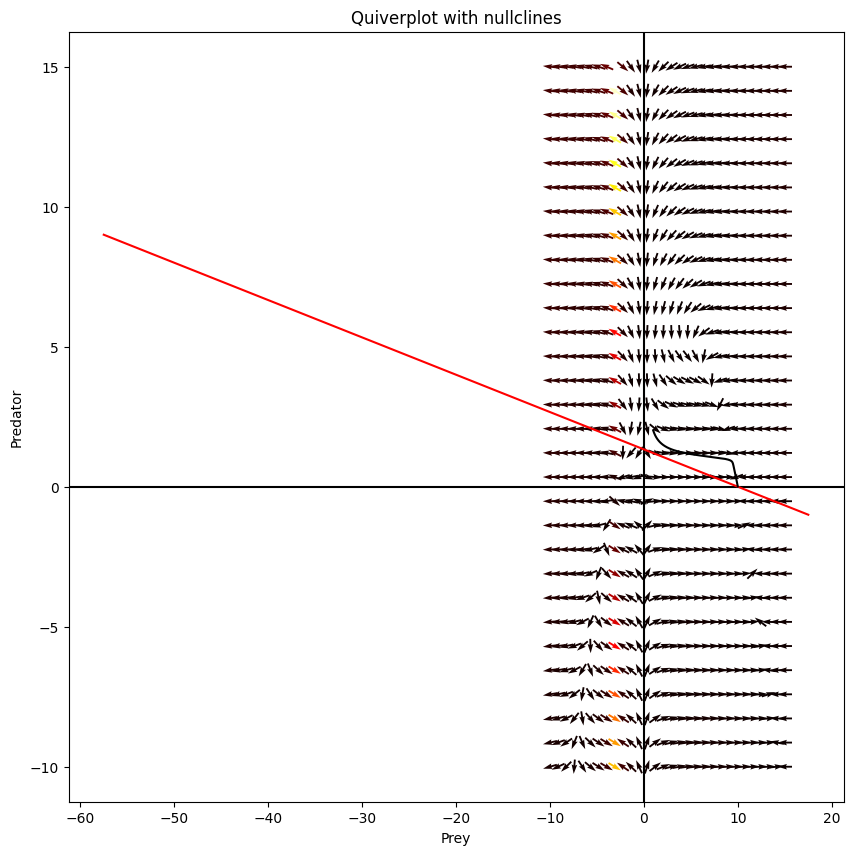

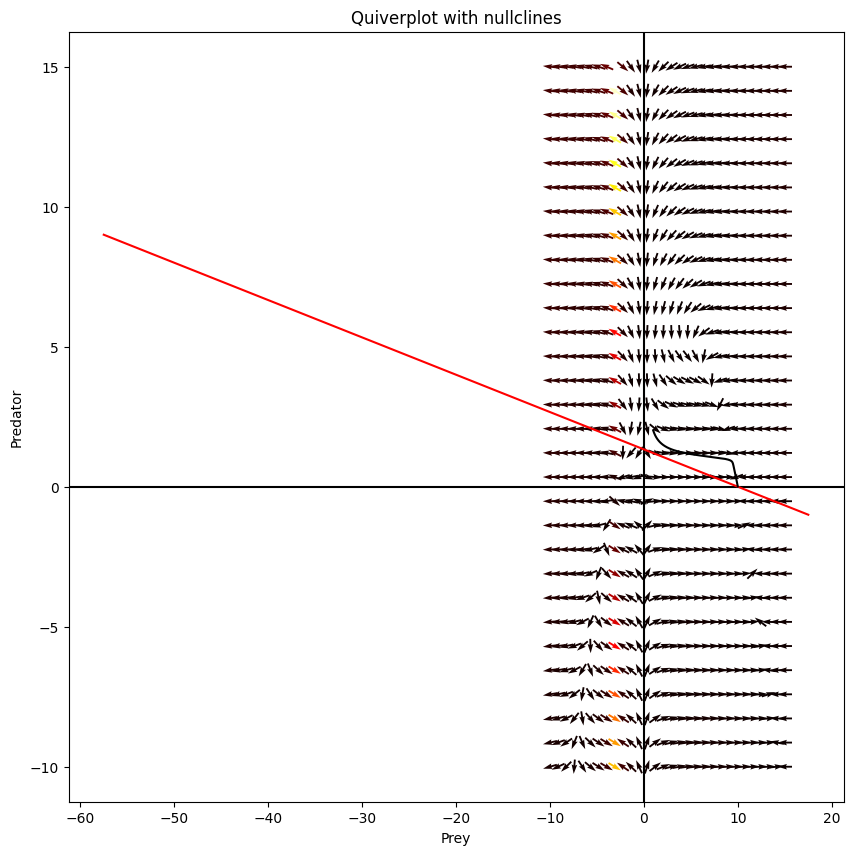

In [11]:
fig2 = plt.figure(figsize=(10,10))
ax4 = fig2.add_subplot(1,1,1)
plt.axvline(0,color='black')
plt.axhline(0,color='black')

# define dimensions for grid
u = np.linspace(-10, 15, 30)
v = np.linspace(-10, 15, 30)
# create grid
X1 , Y1  = np.meshgrid(u, v)
# evaluate system on the grid
DX1, DY1 = LotVmod0D([X1, Y1])
# norm results
M = (np.hypot(DX1, DY1))
# avoid zero division errors
M[M == 0] = 1.
# normalize each arrow
DX1 /= M
DY1 /= M

# plot stream-plot
ax4.quiver(X1, Y1, DX1, DY1, M, pivot='middle',cmap='hot')


rs = np.random.randint(-10,15,2)
lx = 15
ly =5
rx = [lx]
ry = [ly]
for _ in range(150):
    xx,yy = LotVmod0D([rx[-1],ry[-1]])
    lx = lx+xx*0.3
    ly = ly+yy*0.3
    rx.append(lx)
    ry.append(ly)
    

# same as above
ax4.plot(Pcline, range(-1,10), 'r-', label = 'Prey-nullcline')
ax4.plot(range(-1,10), Ccline, 'b-', label = 'Predator-nullcline')
ax4.set_title("Quiverplot with nullclines")
ax4.set_xlabel("Prey")
ax4.set_ylabel("Predator")
ax4.plot(x, y, 'k-')
fig2 = plt.figure(figsize=(10,10))
ax4 = fig2.add_subplot(1,1,1)
plt.axvline(0,color='black')
plt.axhline(0,color='black')

# define dimensions for grid
u = np.linspace(-10, 15, 30)
v = np.linspace(-10, 15, 30)
# create grid
X1 , Y1  = np.meshgrid(u, v)
# evaluate system on the grid
DX1, DY1 = LotVmod0D([X1, Y1])
# norm results
M = (np.hypot(DX1, DY1))
# avoid zero division errors
M[M == 0] = 1.
# normalize each arrow
DX1 /= M
DY1 /= M

# plot stream-plot
ax4.quiver(X1, Y1, DX1, DY1, M, pivot='middle',cmap='hot')


rs = np.random.randint(-10,15,2)
lx = 15
ly =5
rx = [lx]
ry = [ly]
for _ in range(150):
    xx,yy = LotVmod0D([rx[-1],ry[-1]])
    lx = lx+xx*0.3
    ly = ly+yy*0.3
    rx.append(lx)
    ry.append(ly)
    

# same as above
ax4.plot(Pcline, range(-1,10), 'r-', label = 'Prey-nullcline')
ax4.plot(range(-1,10), Ccline, 'b-', label = 'Predator-nullcline')
ax4.set_title("Quiverplot with nullclines")
ax4.set_xlabel("Prey")
ax4.set_ylabel("Predator")
ax4.plot(x, y, 'k-')


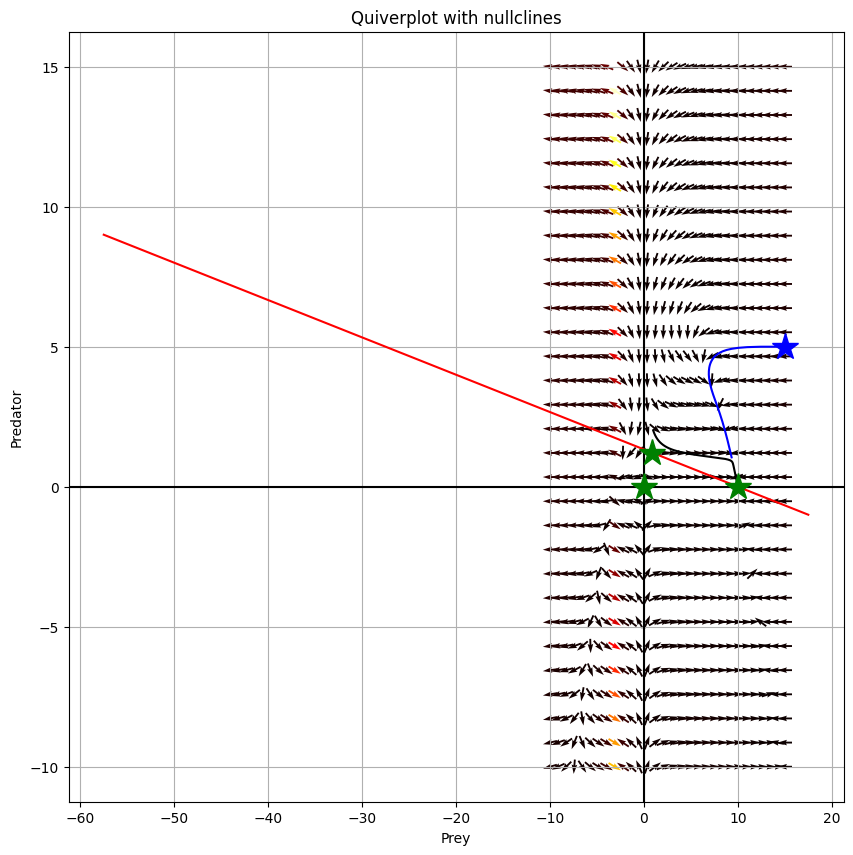

In [12]:
fig2 = plt.figure(figsize=(10,10))
ax4 = fig2.add_subplot(1,1,1)
plt.axvline(0,color='black')
plt.axhline(0,color='black')

# define dimensions for grid
u = np.linspace(-10, 15, 30)
v = np.linspace(-10, 15, 30)
# create grid
X1 , Y1  = np.meshgrid(u, v)
# evaluate system on the grid
DX1, DY1 = LotVmod0D([X1, Y1])
# norm results
M = (np.hypot(DX1, DY1))
# avoid zero division errors
M[M == 0] = 1.
# normalize each arrow
DX1 /= M
DY1 /= M

# plot stream-plot
ax4.quiver(X1, Y1, DX1, DY1, M, pivot='middle',cmap='hot')


rs = np.random.randint(-10,15,2)
lx = 15
ly =5
rx = [lx]
ry = [ly]
for _ in range(150):
    xx,yy = LotVmod0D([rx[-1],ry[-1]])
    lx = lx+xx*0.3
    ly = ly+yy*0.3
    rx.append(lx)
    ry.append(ly)
    

# same as above
ax4.plot(Pcline, range(-1,10), 'r-', label = 'Prey-nullcline')
ax4.plot(range(-1,10), Ccline, 'b-', label = 'Predator-nullcline')
ax4.set_title("Quiverplot with nullclines")
ax4.set_xlabel("Prey")
ax4.set_ylabel("Predator")
ax4.plot(x, y, 'k-')

ax4.plot(rx[0],ry[0],'b*',markersize=20)
ax4.plot(rx, ry, color='blue')
ax4.grid()
#ax4.legend(loc='best')
for f in fp:
    ax4.plot(f[0], f[1],"green", marker = "*", markersize = 20.0)

(b) Hill function -functional response type III (lecture 3) - plot the model’s behavior using n=2.

i. Consider the following parameters with initial conditions P=1, C=2

A. rI=0.5, rG=0.8, rM=0.25, AE=0.6, K=10, h=3

B. rI=1.2, rG=0.3, rM=0.3, AE=0.5, K=10, h=3

C. rI=1.2, rG=0.3, rM=0.6, AE=0.7, K=20, h=3

ii. Write the ODE function and solve numerically.

iii. Plot the solution.

iv. Plot the solution in phase plane (phaseR).

v. Describe in your own words the system behavior and predator - prey interaction for
each set of parameters. 

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def LotVmod0D(states, t, rl, rg, rm, ae, k):
    P, C = states
    ingestC = rl * P**2 * C / (h**2 + P**2)
    growthP = rg * P * (1 - P/k)
    mortC = rm * C
    
    dp = growthP - ingestC
    dc = ingestC * ae - mortC
    
    return np.array([dp, dc])

time = np.arange(0, 200, 1)


In [29]:
# Parameters for case A
rl_A = 0.5
rg_A = 0.8
rm_A = 0.25
ae_A = 0.6
k_A = 10
h = 3

sol_A = odeint(LotVmod0D, [1, 2], time, (rl_A, rg_A, rm_A, ae_A, k_A))

# Parameters for case B
rl_B = 1.2
rg_B = 0.3
rm_B = 0.3
ae_B = 0.5
k_B = 10

sol_B = odeint(LotVmod0D, [1, 2], time, (rl_B, rg_B, rm_B, ae_B, k_B))

# Parameters for case C
rl_C = 1.2
rg_C = 0.3
rm_C = 0.6
ae_C = 0.7
k_C = 20

sol_C = odeint(LotVmod0D, [1, 2], time, (rl_C, rg_C, rm_C, ae_C, k_C))

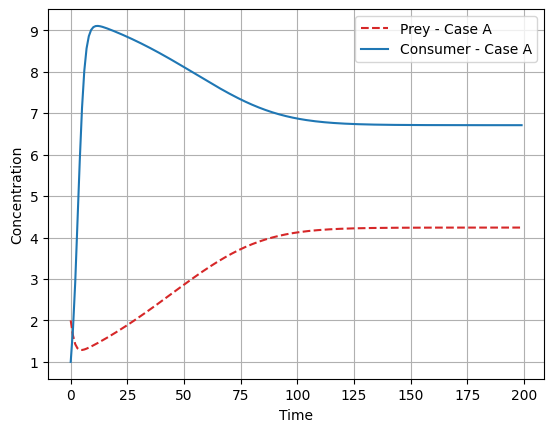

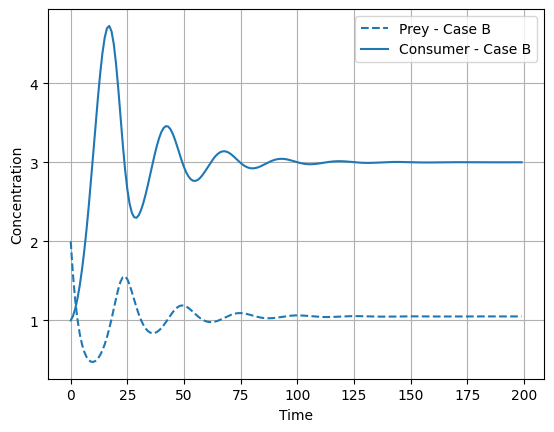

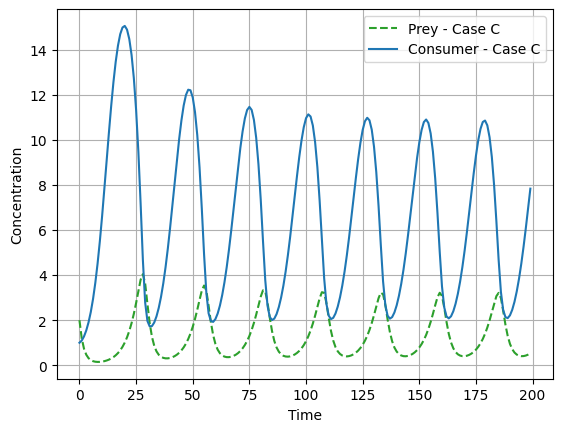

In [30]:
# Plotting the solutions for case A
plt.figure()
plt.plot(time, sol_A[:, 1], color='tab:red', ls='--', label='Prey - Case A')
plt.plot(time, sol_A[:, 0], label='Consumer - Case A')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.grid()
plt.legend()

# Plotting the solutions for case B
plt.figure()
plt.plot(time, sol_B[:, 1], color='tab:blue', ls='--', label='Prey - Case B')
plt.plot(time, sol_B[:, 0], label='Consumer - Case B')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.grid()
plt.legend()

# Plotting the solutions for case C
plt.figure()
plt.plot(time, sol_C[:, 1], color='tab:green', ls='--', label='Prey - Case C')
plt.plot(time, sol_C[:, 0], label='Consumer - Case C')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.grid()
plt.legend()

plt.show()

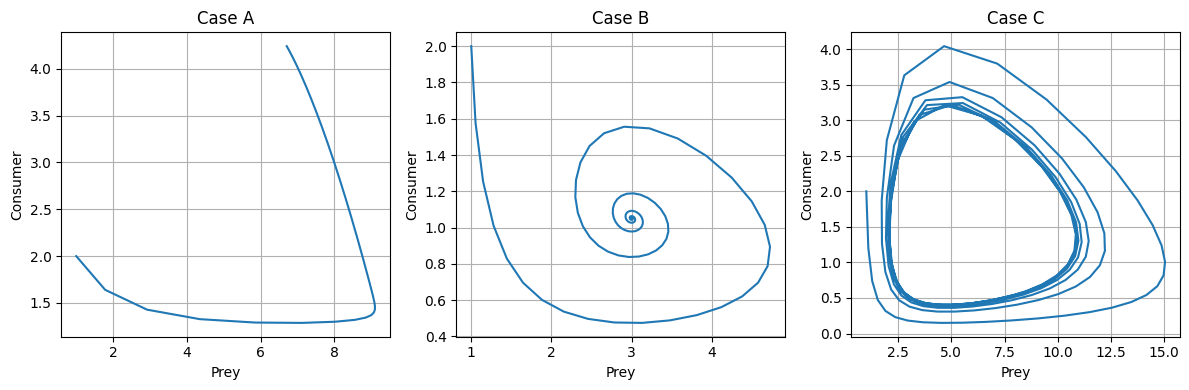

In [31]:
# Plotting the solutions in phase plane
plt.figure(figsize=(12, 4))

# Case A
plt.subplot(1, 3, 1)
plt.plot(sol_A[:, 0], sol_A[:, 1])
plt.xlabel('Prey')
plt.ylabel('Consumer')
plt.title('Case A')
plt.grid()

# Case B
plt.subplot(1, 3, 2)
plt.plot(sol_B[:, 0], sol_B[:, 1])
plt.xlabel('Prey')
plt.ylabel('Consumer')
plt.title('Case B')
plt.grid()

# Case C
plt.subplot(1, 3, 3)
plt.plot(sol_C[:, 0], sol_C[:, 1])
plt.xlabel('Prey')
plt.ylabel('Consumer')
plt.title('Case C')
plt.grid()

plt.tight_layout()
plt.show()


V.

Case A:

With the new parameters, the prey population initially grows rapidly, leading to an increase in the predator population. However, as the prey population reaches a larger size, its growth rate starts to slow down. This causes a cyclical pattern to emerge, with fluctuations between the predator and prey populations.

Case B:

In this scenario, the prey population grows at a slower rate and faces more challenges or risks. As a result, the fluctuations in population size between predators and prey are less pronounced. The predator population, on the other hand, grows faster initially but remains limited in overall size. Consequently, the interaction between predators and prey is not as intense.

Case C:

When the prey population has a higher potential for growth and a larger maximum size it can reach, the fluctuations in population size become more significant. The cycles between predator and prey populations become longer, with more noticeable swings in population size over time.

Overall, these descriptions highlight the different dynamics and patterns that can arise from variations in the parameter values of the Lotka-Volterra model.

C. Consider the prey-predator model where the prey has logistic growth in absence of
predators and the predators have type II functional response (lecture 3) with the following
parameters: 
rI=10, rG=0.8, rM=1, AE=1, K=12, h=9

1. Suppose you can change the K as you wish, discuss the different behavior of the system
as a function of K.

2. Same with rM. 

1.Effects of K:

Increasing K allows for a larger equilibrium prey population, supporting a potentially larger predator population.
Decreasing K restricts prey population growth, resulting in a lower equilibrium prey population and potentially limiting the predator population's size.
2.

Effects of rM:

A higher predator mortality rate leads to a lower equilibrium predator population, potentially allowing the prey population to thrive.
A lower predator mortality rate enables higher population growth, resulting in a larger equilibrium predator population and potentially impacting the prey population negatively.

2. Draw the phase portrait of the predator-prey model

𝑑𝑥/
𝑑𝑡 = 𝑟 ⋅ 𝑥 (1 −
𝑥/
𝐾
 ) − 𝑏 ⋅ 𝑥 ⋅ 𝑦

𝑑𝑦/
𝑑𝑡 = 𝑐 ⋅ 𝑥 ⋅ 𝑦 − 𝑑 ⋅ 𝑦

 If 𝐾 < d/c, can you explain verbally why the predator goes extinct?

If the carrying capacity of the prey population (K) is smaller than the ratio of the predator death rate (d) to the conversion efficiency (c), it means that the prey population cannot support the predator population. In this situation, the available prey population is insufficient to meet the needs and sustain the predator population.

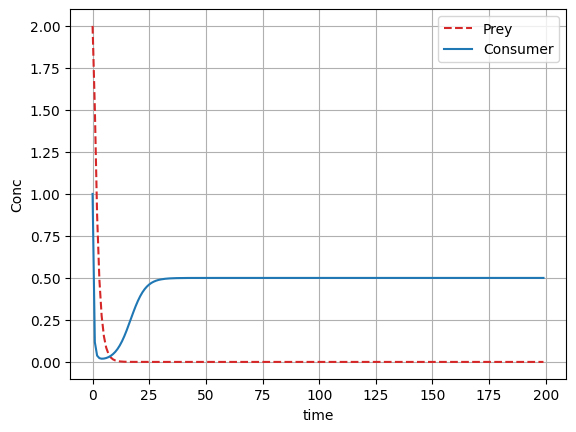

In [14]:
def LotVmod0D(states, t, rl, rg, rm, ae, k):
    P, C = states
    ingestC = rl * P * C 
    growthP = rg * P * (1 - P/k)
    mortC = rm * C
    
    dp = growthP - ingestC
    dc = (ingestC * ae) - mortC
    
    return np.array([dp, dc])

time = np.arange(0,200,1)
sol = odeint(LotVmod0D,[1,2],time,(1.2,0.3,0.6,0.7,0.5))
plt.plot(time,sol[:,1],color='tab:red',ls='--',label='Prey')
plt.plot(time,sol[:,0],label='Consumer')
plt.ylabel('Conc')
plt.xlabel('time')
plt.grid()
plt.legend()